![star_wars_unsplash](https://images.unsplash.com/photo-1585366119957-e9730b6d0f60?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

The introduction of its first licensed series, Star Wars, was a hit that sparked a series of collaborations with more themed sets. The partnerships team has asked you to perform an analysis of this success, and before diving into the analysis, they have suggested reading the descriptions of the two datasets to use, reported below.

## The Data

You have been provided with two datasets to use. A summary and preview are provided below.

## lego_sets.csv

| Column     | Description              |
|------------|--------------------------|
| `"set_num"` | A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid! |
| `"name"` | The name of the set. |
| `"year"` | The date the set was released. |
| `"num_parts"` | The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable. |
| `"theme_name"` | The name of the sub-theme of the set. |
| `"parent_theme"` | The name of the parent theme the set belongs to. Matches the name column of the parent_themes csv file.
|

## parent_themes.csv

| Column     | Description              |
|------------|--------------------------|
| `"id"` | A code that is unique to every theme. |
| `"name"` | The name of the parent theme. |
| `"is_licensed"` | A Boolean column specifying whether the theme is a licensed theme. |




## Objective
1. Calculate the percentage of all licensed sets ever released that were Star Wars themed.
2. Identify the year with the highest number of Star Wars sets released.

In [2]:
# Import pandas, read and inspect the datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lego_sets = pd.read_csv('lego_sets.csv', sep=';')
lego_sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [3]:
parent_themes = pd.read_csv('parent_themes.csv', sep=';')
parent_themes.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


51


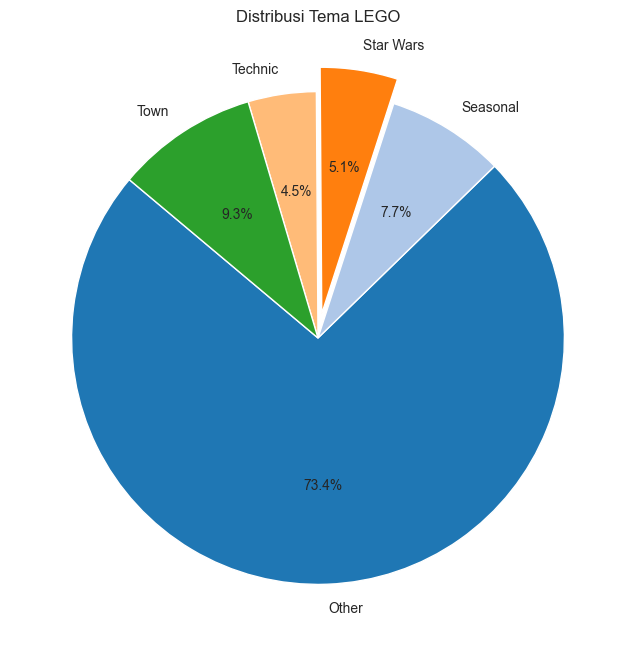

In [23]:
#ploting with pie chart
# Count the number of LEGO sets per theme parent_theme
parent_theme_count = lego_sets['parent_theme'].value_counts().reset_index()

# Add a column for proportion to total licensed themes
parent_theme_count['proportion'] = parent_theme_count['count'] / total_lego_set_licensed

the_force = parent_theme_count[parent_theme_count['parent_theme'] == 'Star Wars']['proportion']

# Calculate the percentage of LEGO Star Wars among all LEGO with licensed themes
the_force = star_wars_set_count / total_lego_set_licensed * 100

# Convert percentage results to whole numbers
the_force = the_force.astype('int')
print(the_force)

#ploting with pie chart
# Top 4
top_theme = parent_theme_count['parent_theme'].head(4).values.tolist()

# Add a new theme field, changing the small theme to 'Other'
parent_theme_count['new_parent_theme'] = parent_theme_count['parent_theme'].apply(
    lambda x: x if x in top_theme else 'Other'
)

# Merge all small categories (Other)
parent_theme_count = parent_theme_count.groupby('new_parent_theme').sum('proportion').reset_index()

# Add explode parameter to separate Star Wars
explode = [0.1 if label == 'Star Wars' else 0 for label in parent_theme_count['new_parent_theme']]

# Visualisasi pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    parent_theme_count['proportion'],
    labels=parent_theme_count['new_parent_theme'],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Pisahkan bagian Star Wars
    colors=plt.cm.tab20.colors  # Berikan warna dari palet tab20
)
plt.title('Distribusi Tema LEGO')
plt.show()


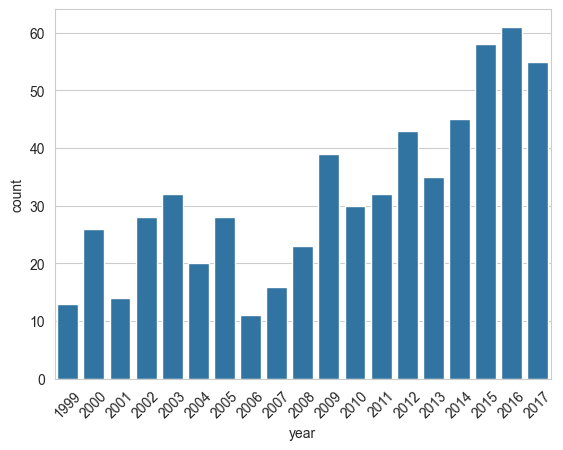

In [10]:
# Calculate the number of Star Wars sets released per year
star_wars_released_per_year = (
    lego_sets[lego_sets['parent_theme'] == 'Star Wars']['year']
    .value_counts()
    .reset_index()
)

# Identify the year(s) with the maximum count
new_era = star_wars_released_per_year[star_wars_released_per_year['count'] == star_wars_released_per_year['count'].max()]['year']

# Convert `new_era` to an integer if there's only one year, otherwise convert it to a list
new_era = int(new_era.iloc[0])

# Visualization using barplot
sns.set_style("whitegrid")
sns.barplot(data=star_wars_released_per_year, x='year', y='count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()